In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
1. Remove features with more than 50% values missing
2. Remove features that seem unrelated or are inappopriate to include in the feature set
3. Inspect remaining object type features to see if any more can be removed

In [130]:
df = pd.read_csv('./data/2017Q4.csv')

In [131]:
df.shape

(59324, 55)

In [132]:
# Check missing values count and percent
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
missing_data= pd.concat([total, percent],axis=1, keys=["Total Null", "Percent of Nulls"])
missing_data.head(25)

,Total Null,Percent of Nulls
revol_bal_joint,50692,85.449397
sec_app_inq_last_6mths,50691,85.447711
dti_joint,50691,85.447711
sec_app_earliest_cr_line,50691,85.447711
sec_app_fico_range_high,50691,85.447711
annual_inc_joint,50691,85.447711
mths_since_recent_bc_dlq,46943,79.129863
mths_since_recent_revol_delinq,41556,70.049221
mths_since_last_delinq,32372,54.568134
il_util,9317,15.705279


Review the col with 50% or more missing values

revol_bal_joint	50692	%85.449397

sec_app_inq_last_6mths	50691	%85.447711
Credit inquiries in the last 6 months at time of application for the

dti_joint	50691	%85.447711

sec_app_earliest_cr_line	50691	%85.447711

sec_app_fico_range_high	50691	%85.447711

annual_inc_joint	50691	%85.447711

mths_since_recent_bc_dlq	46943	%79.129863

mths_since_recent_revol_delinq	41556	%70.049221

mths_since_last_delinq	32372	%54.568134

In [133]:
# remove columns with more than 50% missing values
threshold = len(df)/2
df = df.dropna(axis=1, thresh=threshold)

In [134]:
# check that columns with more than 50% Nulls are removed
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
missing_data= pd.concat([total, percent],axis=1, keys=["Total Null", "Percent of Nulls"])
missing_data.head(25)

,Total Null,Percent of Nulls
il_util,9317,15.705279
emp_title,4943,8.332210
emp_length,4868,8.205785
bc_util,997,1.680601
percent_bc_gt_75,977,1.646888
bc_open_to_buy,973,1.640146
mths_since_recent_bc,911,1.535635
dti,108,0.182051
revol_util,92,0.155081
all_util,18,0.030342


In [135]:
# Handle Missing Values either by imputing or removing
#il_util	9317	15.705279
#emp_title	4943	8.332210
#emp_length	4868	8.205785
#bc_util	997	1.680601
#percent_bc_gt_75	977	1.646888
#bc_open_to_buy	973	1.640146
#mths_since_recent_bc	911	1.535635
#dti	108	0.182051
#revol_util	92	0.155081
#all_util	18	0.030342

# manual removal
# id - unrelated feature
# zip_code - unrelated feature
# il_util - 2x higher than the remaining na percentages, other var cover similar info, as this is a new var introduced after December 2015
# percent_bc_gt_75 - future value
# bc_open_to_buy - future value
# mths_since_recent_bc - future value
# all_util - other var cover similar info, as this is a new var introduced after December 2015
features_to_remove = ["id", "zip_code", "il_util", "percent_bc_gt_75", "bc_open_to_buy", "mths_since_recent_bc", "all_util"]
df.drop(features_to_remove, axis=1, inplace=True)

In [136]:
# manual removal objects that don't add value
# Checking columns that are of dtype 'object'
df.columns[df.dtypes == 'object']

Index(['term', 'int_rate', 'emp_title', 'emp_length', 'home_ownership',
       'loan_status', 'purpose', 'addr_state', 'earliest_cr_line',
       'revol_util', 'application_type'],
      dtype='object')

In [137]:
# inspect values to see which objects should be removed
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('************************')

 36 months    41294
 60 months    18030
Name: term, dtype: int64
************************
11.99%    4038
9.44%     3974
10.42%    3903
9.93%     3809
12.62%    3709
13.59%    3319
14.08%    3247
15.05%    3084
16.02%    2901
7.97%     2860
7.35%     2833
10.91%    2778
17.09%    2041
18.06%    1953
5.32%     1733
19.03%    1705
20.00%    1691
6.72%     1666
21.45%    1483
6.08%     1330
7.21%     1167
7.07%      862
23.88%     626
24.85%     522
26.30%     450
25.82%     445
22.91%     333
28.72%     233
30.79%     126
30.75%     107
30.17%      98
29.69%      97
30.65%      80
30.89%      31
30.84%      29
30.94%      27
6.00%       17
30.99%      17
Name: int_rate, dtype: int64
************************
Teacher                       1079
Manager                       1042
Owner                         1001
Driver                         521
Registered Nurse               445
                              ... 
Designer/digital pressman        1
MOTOR COACH OPERATOR             1
Direct

In [138]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.
# There are too many employment titles to feasible use one hot encoding
obj_feature_to_remove = ['emp_title', 'addr_state', 'application_type']
df.drop( obj_feature_to_remove ,axis=1,inplace=True)

# Feature Engineering
1. Impute numerical values with median
2. Impute missing categorical values with mode
3. One hot encode to categorical values
4. Convert strings to numerical values
5. Convert strings to datetime type with extracted numerical values

In [139]:
# Ratio of total current balance to high credit/credit limit for all bankcard accounts.
df["bc_util"]= df["bc_util"].fillna(df["bc_util"].mode()[0])

In [140]:
# Converting objects to datetime columns
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"].astype('str'), format='%b-%y', yearfirst=False)
df["earliest_cr_line"] = pd.DatetimeIndex(df["earliest_cr_line"]).year

print(df.columns.values)
pd.set_option('max_columns', None)
df.head()

['funded_amnt' 'term' 'int_rate' 'installment' 'emp_length'
 'home_ownership' 'annual_inc' 'loan_status' 'purpose' 'dti' 'delinq_2yrs'
 'earliest_cr_line' 'fico_range_high' 'inq_last_6mths' 'open_acc'
 'revol_bal' 'revol_util' 'total_acc' 'open_act_il' 'open_il_24m'
 'open_rv_24m' 'total_rev_hi_lim' 'inq_last_12m' 'acc_open_past_24mths'
 'bc_util' 'mort_acc' 'num_accts_ever_120_pd' 'num_rev_accts'
 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_90g_dpd_24m'
 'num_tl_op_past_12m' 'pct_tl_nvr_dlq' 'pub_rec_bankruptcies'
 'total_bal_ex_mort' 'total_bc_limit']


,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,open_act_il,open_il_24m,open_rv_24m,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_util,mort_acc,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit
0,6000,36 months,7.97%,187.94,< 1 year,MORTGAGE,30000.0,Current,house,20.08,0,1992,684,1,9,3002,13.80%,12,1,1,3,21700,1,4,20.6,0,0,11,5,9,0,1,100.0,1,18032,11400
1,10000,60 months,12.62%,225.60,5 years,MORTGAGE,47300.0,In Grace Period,major_purchase,4.87,0,2002,714,1,13,8184,18.20%,38,0,2,4,44900,5,7,21.1,4,0,29,6,13,0,3,97.4,0,8184,31600
2,1500,36 months,6.72%,46.13,9 years,MORTGAGE,30975.0,Current,house,1.63,0,2001,814,0,4,537,7.10%,8,0,0,0,7600,0,0,19.1,1,0,6,2,4,0,0,100.0,0,537,1800
3,8400,36 months,9.93%,270.77,NaN,RENT,18000.0,Fully Paid,debt_consolidation,16.33,0,1998,754,0,5,3215,26.60%,12,1,2,2,12100,0,4,26.6,0,0,9,2,5,0,0,100.0,0,10176,12100
4,24000,36 months,12.62%,804.27,< 1 year,RENT,20000.0,Current,debt_consolidation,3.00,0,1992,794,0,5,690,5.70%,10,0,0,4,12100,0,4,6.7,0,0,10,2,5,0,2,100.0,0,690,10300


In [141]:
# Converting int_rate to numerical columns
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

In [142]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['home_ownership','purpose'],drop_first = True)

In [143]:
# Employment length in years. 
# Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
df["emp_length"]= df["emp_length"].fillna(df["emp_length"].mode()[0]) # categorical
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')

df.head()


,funded_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,open_act_il,open_il_24m,open_rv_24m,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_util,mort_acc,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
0,6000,36 months,7.0,187.94,0.0,30000.0,Current,20.08,0,1992,684,1,9,3002,13.80%,12,1,1,3,21700,1,4,20.6,0,0,11,5,9,0,1,100.0,1,18032,11400,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,10000,60 months,12.0,225.60,5.0,47300.0,In Grace Period,4.87,0,2002,714,1,13,8184,18.20%,38,0,2,4,44900,5,7,21.1,4,0,29,6,13,0,3,97.4,0,8184,31600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1500,36 months,6.0,46.13,9.0,30975.0,Current,1.63,0,2001,814,0,4,537,7.10%,8,0,0,0,7600,0,0,19.1,1,0,6,2,4,0,0,100.0,0,537,1800,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,8400,36 months,9.0,270.77,10.0,18000.0,Fully Paid,16.33,0,1998,754,0,5,3215,26.60%,12,1,2,2,12100,0,4,26.6,0,0,9,2,5,0,0,100.0,0,10176,12100,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,24000,36 months,12.0,804.27,0.0,20000.0,Current,3.00,0,1992,794,0,5,690,5.70%,10,0,0,4,12100,0,4,6.7,0,0,10,2,5,0,2,100.0,0,690,10300,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [144]:
# Filling null values with median(string) which is close to 42%.
# med = df.revol_util.median()
df.revol_util.fillna('42%',inplace=True)  

# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')

In [145]:
#dti	108	0.182051
#"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income" 
# remove outliers
# min is 0, no need to remove -1
df["dti"].describe().round(2)

count    59216.00
mean        19.51
std         21.06
min          0.00
25%         11.23
50%         17.62
75%         24.96
max        999.00
Name: dti, dtype: float64

In [146]:

df["dti"]= df["dti"].fillna(df["dti"].median())

In [147]:
# convert string to numerical data, "36 months" to int type
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

df.head()
# Last check to find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59324 entries, 0 to 59323
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   funded_amnt                 59324 non-null  int64  
 1   term                        59324 non-null  int64  
 2   int_rate                    59324 non-null  float64
 3   installment                 59324 non-null  float64
 4   emp_length                  59324 non-null  float64
 5   annual_inc                  59324 non-null  float64
 6   loan_status                 59324 non-null  object 
 7   dti                         59324 non-null  float64
 8   delinq_2yrs                 59324 non-null  int64  
 9   earliest_cr_line            59324 non-null  int64  
 10  fico_range_high             59324 non-null  int64  
 11  inq_last_6mths              59324 non-null  int64  
 12  open_acc                    59324 non-null  int64  
 13  revol_bal                   593

# Create Target Variable
1. Establish Definition for a good loan vs bad loan. 
2. Create target variable - loan_repaid

In [148]:
# Good Loan will pay back
# Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
# 1 - Current, Fully Paid
# Bad Loan will not pay back
# 0 - Charged Off, In Grace Period, 'Late (16-30 days)', 'Late (31-120 days)'

# Current can go in Bad Loan for now, even though it could become good
# Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

# df["loan_repaid"] = np.where((df.loan_status == 'Current') |
#                         (df.loan_status == 'Fully Paid'), 1, 0)

df["loan_repaid"] = np.where(
                        (df.loan_status == 'Fully Paid'), 1, 0)

In [149]:
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,0,Current
1,0,In Grace Period
2,0,Current
3,1,Fully Paid
4,0,Current
...,...,...
59319,0,Current
59320,0,Current
59321,0,Current
59322,0,Current


In [150]:
df.drop("loan_status", axis=1, inplace=True)

/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

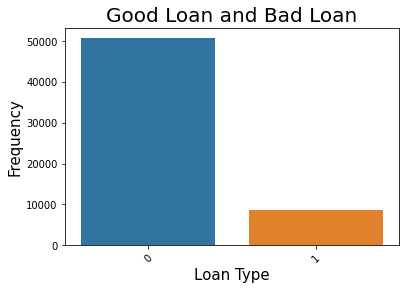

In [151]:
# Countplot of Good Loans and Bad Loans
g= sns.countplot(df["loan_repaid"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

# Colinearity Study

In [152]:
# Check correlation between Loan_Class and all other independent variables
correlation_m = df.corr(method='pearson')
correlation_m["loan_repaid"].sort_values(ascending=False)
# df.info()

loan_repaid                   1.000000
open_il_24m                   0.091474
acc_open_past_24mths          0.088010
num_tl_op_past_12m            0.083702
inq_last_12m                  0.071260
total_acc                     0.069019
mort_acc                      0.058022
inq_last_6mths                0.048052
num_rev_accts                 0.043179
open_rv_24m                   0.041040
home_ownership_MORTGAGE       0.032631
fico_range_high               0.026520
pub_rec_bankruptcies          0.025567
purpose_other                 0.016699
int_rate                      0.015825
purpose_house                 0.014281
earliest_cr_line              0.013240
purpose_home_improvement      0.012035
pct_tl_nvr_dlq                0.011866
num_accts_ever_120_pd         0.011846
emp_length                    0.011214
open_acc                      0.010549
purpose_vacation              0.010538
num_sats                      0.010478
annual_inc                    0.010392
total_bal_ex_mort        

<AxesSubplot:>

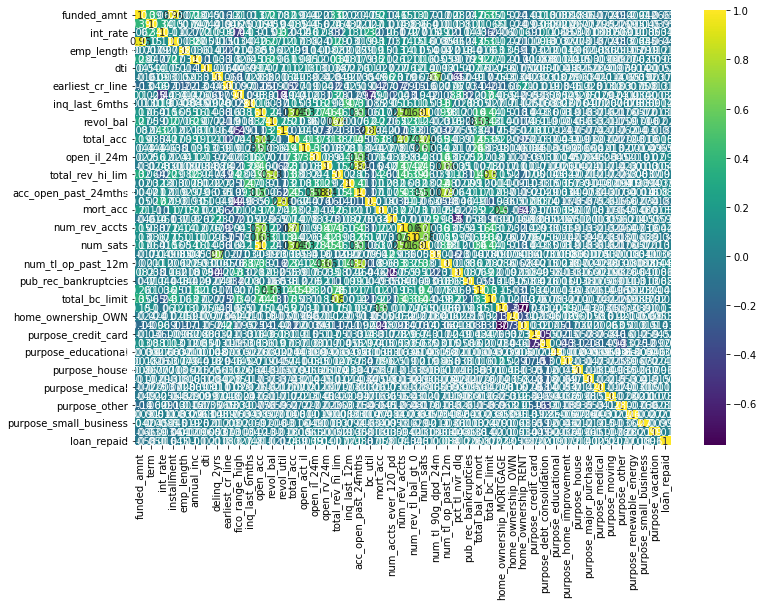

In [153]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [154]:
# Last check to find if there are any null values
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))
df.isnull().sum()

False
True


funded_amnt                   0
term                          0
int_rate                      0
installment                   0
emp_length                    0
annual_inc                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
open_act_il                   0
open_il_24m                   0
open_rv_24m                   0
total_rev_hi_lim              0
inq_last_12m                  0
acc_open_past_24mths          0
bc_util                       0
mort_acc                      0
num_accts_ever_120_pd         0
num_rev_accts                 0
num_rev_tl_bal_gt_0           0
num_sats                      0
num_tl_90g_dpd_24m            0
num_tl_op_past_12m            0
pct_tl_nvr_dlq                0
pub_rec_bankruptcies          0
total_ba

In [155]:
# save to disk
df.to_csv('./data/data_clean.csv', index=False)
print('Processed Data:', df.shape)

Processed Data: (59324, 49)


# Exported cleaned csv file 
- features reduced from to 55 to 49